<a href="https://colab.research.google.com/github/Podushka228/MiTMOvPZ/blob/main/MiTMOvPZ_6_zadanie_%D0%AF%D0%BC%D1%89%D0%B8%D0%BA%D0%BE%D0%B2_%D0%9C%D0%B8%D1%85%D0%B0%D0%B8%D0%BB_6015_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install lxml

# Задание

Вместо Beautiful Soup использовать библиотеку [LXML](https://lxml.de/).

1. найти h2 теги с атрибутом align равным center
2. найти h2 теги у которых есть аттрибут align
3. извлечь текстовое содержимое тега с разметкой внутри
4. извлечь два первых параграфа с текстом из страницы на Википедии
5. извлечь список районов Дубны
6. извлечь таблицу климата
7. сохранить изображения

In [2]:
import lxml
from lxml import etree, html
import requests
from lxml.html import fromstring, parse
from io import StringIO, BytesIO


In [3]:
url="https://ru.wikipedia.org/wiki/Дубна"
res = requests.get(url)
doc = lxml.html.fromstring(res.text)
doc.text_content()

'\n\n\nДубна — Википедия\ndocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"1086828c-3fc9-488a-a207-26f9c5b0c99c","wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Дубна","wgTitle":"Дубна","wgCurRevisionId":134311532,"wgRevisionId":134311532,"wgArticleId":12680,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Википедия:Cite web (не указан язык)","Википедия:Cite web (недоступные ссылки без архивной копии)","Википедия:Cite web (некорректный url)",\n"Википедия:Cite web (заменить webcitation-архив: deadlink yes)","Википедия:Статьи со сложным входом в Модуль:URL","НП:Статус:Город областного подчинения","ПРО:Гор

In [23]:
r = doc.xpath('.//h2/span[@class="mw-headline"]/text()')
print(len(r))
print(*r, sep='\n')

19
Этимология
История
Климат
Население
Образование и наука
Градообразующие предприятия
Производственные предприятия
Культура
Архитектура
Храмы Дубны
Памятники и памятные знаки в Дубне
Спорт
Транспорт
СМИ
В честь города названы
См. также
Примечания
Литература
Ссылки


# doc.findall(<font color=red>'**.//**h2'</font>)

https://lxml.de/tutorial.html

In [21]:
elements = doc.findall('.//h2') # ищет везде в дереве (https://lxml.de/tutorial.html)
print(len(elements))
elements

22


[<Element h2 at 0x7a0d806ed170>,
 <Element h2 at 0x7a0d806ed260>,
 <Element h2 at 0x7a0d806ed2b0>,
 <Element h2 at 0x7a0d806ed300>,
 <Element h2 at 0x7a0d806ed350>,
 <Element h2 at 0x7a0d806ed3a0>,
 <Element h2 at 0x7a0d806ed3f0>,
 <Element h2 at 0x7a0d806ed440>,
 <Element h2 at 0x7a0d806ed490>,
 <Element h2 at 0x7a0d806ed4e0>,
 <Element h2 at 0x7a0d806ed530>,
 <Element h2 at 0x7a0d806ed580>,
 <Element h2 at 0x7a0d806ed5d0>,
 <Element h2 at 0x7a0d806ed620>,
 <Element h2 at 0x7a0d806ed670>,
 <Element h2 at 0x7a0d806ed6c0>,
 <Element h2 at 0x7a0d806ed710>,
 <Element h2 at 0x7a0d806ed760>,
 <Element h2 at 0x7a0d806ed7b0>,
 <Element h2 at 0x7a0d806ed800>,
 <Element h2 at 0x7a0d806ed850>,
 <Element h2 at 0x7a0d806ed8a0>]

1. найти h2 теги с атрибутом align равным center

In [ ]:
center = doc.findall('.//h2[@align="center"]')
center # Нет таких тегов с данным атрибутом

[]

2. найти h2 теги у которых есть аттрибут align

In [ ]:
atribut = doc.findall('.//h2[@align]')
atribut # Нет таких тегов с данным атрибутом

[]

3. извлечь текстовое содержимое тега h2 с разметкой внутри




In [35]:
content = doc.xpath('.//div/h2/text()')
content

['Содержание', 'Навигация']

4. извлечь два первых параграфа с текстом из страницы на Википедии

In [132]:
paragraphs = doc.xpath('.//div[@id="mw-content-text"]/div[@class="mw-content-ltr mw-parser-output"]/p')

print(paragraphs[0].text_content(), paragraphs[1].text_content())

Дубна́[2] — город, наукоград на севере Московской области (в 121 км. от Москвы), крупнейший в России центр по исследованиям в области ядерной физики. Население — 74 193[1] чел. (2023 г.).
 Город расположен на реке Волге, ограничен реками Дубной и Сестрой, каналом имени Москвы и Иваньковским водохранилищем. Единственный населённый пункт Московской области, расположенный на Волге.



Извлечь список районов Дубны

In [13]:
neighborhood= doc.xpath('.//td[@class="plainlist"]/p/span[@class="nowrap"]/text()')
neighborhood1= doc.xpath('.//td[@class="plainlist"]/span[@class="nowrap"]/text()')
print(neighborhood + neighborhood1)

['Институтская часть,', 'Чёрная Речка,', 'Большая Волга,', 'Тридцатка,', 'Подберезье,']


Извлечь таблицу климата

In [109]:
table_title = "Климат"
table = doc.xpath('//table[.//caption[contains(., "%s")]]' % table_title)[0]

# Вытягиваем строки
header = table.xpath('.//tr[1]/*')
hrows = table.xpath('.//tr[position() > 1]//th')
rows = table.xpath('.//tr[position() > 1]//td')
hr = []
h = []
r = []
for i in range(len(hrows)):
  hr.append(hrows[i].text_content().replace("\n",""))
print(hr)
for i in range(len(header)):
  h.append(header[i].text_content().replace("\n",""))
print(h)
for i in range(len(rows)-1):
  r.append(rows[i].text_content().replace("\n",""))
print(r)

['Средний максимум, °C', 'Средняя температура, °C', 'Средний минимум, °C', 'Норма осадков, мм']
['Показатель', 'Янв.', 'Фев.', 'Март', 'Апр.', 'Май', 'Июнь', 'Июль', 'Авг.', 'Сен.', 'Окт.', 'Нояб.', 'Дек.', 'Год']
['−6,2', '−5,1', '0,9', '10', '17,6', '21,2', '23,4', '21,2', '15', '7,8', '0,3', '−4', '8,5', '−9,1', '−8,7', '−3', '5,1', '12', '16,1', '18,2', '16,1', '10,6', '4,6', '−2', '−6,5', '4,4', '−12,1', '−12', '−6,5', '1', '7,1', '11,2', '13,7', '11,8', '7,1', '2,1', '−4,1', '−9,1', '0,9', '40', '33', '31', '36', '56', '71', '77', '69', '57', '58', '48', '44', '620']


In [106]:
import pandas as pd

In [107]:
slice_size = int(len(r)/(len(hr)))

values = []
for i in range(len(hr)):
  values.append([hr[i]])
  values[i].extend(r[i*slice_size:(i+1)*slice_size])


climate = pd.DataFrame(values, columns=h)
climate

,Показатель,Янв.,Фев.,Март,Апр.,Май,Июнь,Июль,Авг.,Сен.,Окт.,Нояб.,Дек.,Год
0,"Средний максимум, °C","−6,2","−5,1","0,9",10,"17,6","21,2","23,4","21,2",15,"7,8","0,3",−4,"8,5"
1,"Средняя температура, °C","−9,1","−8,7",−3,"5,1",12,"16,1","18,2","16,1","10,6","4,6",−2,"−6,5","4,4"
2,"Средний минимум, °C","−12,1",−12,"−6,5",1,"7,1","11,2","13,7","11,8","7,1","2,1","−4,1","−9,1","0,9"
3,"Норма осадков, мм",40,33,31,36,56,71,77,69,57,58,48,44,620


7. сохранить изображения

In [185]:
image1=doc.xpath('.//div[@class="thumb"]//img/@src')
len(image1)

25

In [186]:
links = ['https:' + src for src in image1]
links

['https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/Cottage_Dubna-4.JPG/451px-Cottage_Dubna-4.JPG',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/House_Culture_Mir_Dubna-2.JPG/451px-House_Culture_Mir_Dubna-2.JPG',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Rotunda_Dubna.JPG/451px-Rotunda_Dubna.JPG',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Dubna_Hotel_1.JPG/451px-Dubna_Hotel_1.JPG',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Blokhintsev_Library_Dubna.JPG/451px-Blokhintsev_Library_Dubna.JPG',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/%D0%A1onference_Hall_Dubna.JPG/451px-%D0%A1onference_Hall_Dubna.JPG',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Meshcheryakov_Street_Store_Dubna.JPG/451px-Meshcheryakov_Street_Store_Dubna.JPG',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Sakharov_Street_Dubna.JPG/451px-Sakharov_Street_Dubna.JPG',
 'https://upload.wikimedia.org/wikip

In [187]:
fnames = [link.split('/')[-1] for link in links]
fnames

['451px-Cottage_Dubna-4.JPG',
 '451px-House_Culture_Mir_Dubna-2.JPG',
 '451px-Rotunda_Dubna.JPG',
 '451px-Dubna_Hotel_1.JPG',
 '451px-Blokhintsev_Library_Dubna.JPG',
 '451px-%D0%A1onference_Hall_Dubna.JPG',
 '451px-Meshcheryakov_Street_Store_Dubna.JPG',
 '451px-Sakharov_Street_Dubna.JPG',
 '451px-Bogolyubov_Prospekt_Dubna-2.JPG',
 '451px-Vulykh_Towers_Dubna.JPG',
 '451px-Bogolyubov_Prospekt_Dubna.JPG',
 '451px-Residential_Complex_Frigate_Dubna.JPG',
 '451px-Dubna_House.JPG',
 '449px-Dubna_Lenin.JPG',
 '449px-Dubna_9P512_2_of_3.JPG',
 '449px-Dubna_Ilyushin_Il-2_4_of_4.JPG',
 '448px-%D0%9F%D0%B0%D0%BC%D1%8F%D1%82%D0%BD%D0%B8%D0%BA_Aero_L-29_Delfin_%D0%B2_%D0%B4%D1%83%D0%B1%D0%BD%D0%B5.jpg',
 '451px-Dubna_Monument_Mikoyan-Gurevich_MiG-25.JPG',
 '451px-Casemate_Dubna.JPG',
 '449px-Dubna_War_Memorial_and_Gardens.JPG',
 '451px-L%C3%A9ger_Mosaics_Dubna.JPG',
 '451px-L%C3%A9ger_Mosaics_Dubna-2.JPG',
 '451px-Pool_Archimedes_Dubna.JPG',
 '451px-Stadium_Nauka_Dubna.JPG',
 '450px-Sunset_at_Dubna..

In [190]:
cd /content

/content


In [191]:
mkdir -p /content1/dubna_images

In [192]:
cd dubna_images

/content/dubna_images


In [193]:
ls

14px-OOjs_UI_icon_edit-ltr-progressive.svg.png
14px-Wikipedia_interwiki_section_gear_icon.svg.png
15px-Commons-logo.svg.png
160px-Flag_of_Dubna_%28Moscow_oblast%29_%282003%29.png
220px-Association_Atom_Dubna.JPG
220px-Cultur_House_Dubna.JPG
220px-%D0%94%D0%9A_%D0%9E%D0%BA%D1%82%D1%8F%D0%B1%D1%80%D1%8C.jpg
220px-%D0%9F%D0%B0%D0%BC%D1%8F%D1%82%D0%BD%D0%B8%D0%BA_%D0%BF%D0%BE%D0%B3%D0%B8%D0%B1%D1%88%D0%B8%D0%BC_%D0%B7%D0%B5%D0%BC%D0%BB%D1%8F%D0%BA%D0%B0%D0%BC_9_%D0%BC%D0%B0%D1%8F.jpg
220px-%D0%9F%D1%80%D0%BE%D1%85%D0%BE%D0%B4%D0%BD%D0%B0%D1%8F_%D0%94%D0%9C%D0%97_%D0%B8%D0%BC._%D0%9D.%D0%9F.%D0%A4%D0%B5%D0%B4%D0%BE%D1%80%D0%BE%D0%B2%D0%B0.jpg
220px-%D0%A2%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D0%BA%D0%B0%D0%BC_%D1%82%D1%8B%D0%BB%D0%B0.jpg
220px-%D0%A4%D0%B8%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BC_%D0%BD%D0%B0_%D1%83%D0%BB%D0%B8%D1%86%D0%B5_%D0%9B%D0%B5%D0%BD%D0%B8%D0%BD%D0%B0_%D0%B2_%D0%94%D1%83%D0%B1%D0%BD%D0%B5.jpg
220px-%D0%A5%D1%80%D0%B0%D0%BC_%D0%9F%D0%BE%D1%85%D0%B2%D0%B0%D0%BB

In [194]:
def dwnld_image(url, save_to):
    response = requests.get(url,
                            allow_redirects=True,
                            headers =
                            {'User-Agent': f'StudentCode/0.1 requests/{requests.__version__}'}
    )
    print(url, response)
    if response.status_code != 200:
        raise Exception(response.text)

    with open(save_to, 'wb') as f:
        f.write(response.content)

In [195]:
from time import sleep
for l, fn in zip(links, fnames):
    dwnld_image(l, '/content/dubna_images/' + fn)
    sleep(3)

https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/Cottage_Dubna-4.JPG/451px-Cottage_Dubna-4.JPG <Response [200]>
https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/House_Culture_Mir_Dubna-2.JPG/451px-House_Culture_Mir_Dubna-2.JPG <Response [200]>
https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Rotunda_Dubna.JPG/451px-Rotunda_Dubna.JPG <Response [200]>
https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Dubna_Hotel_1.JPG/451px-Dubna_Hotel_1.JPG <Response [200]>
https://upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Blokhintsev_Library_Dubna.JPG/451px-Blokhintsev_Library_Dubna.JPG <Response [200]>
https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/%D0%A1onference_Hall_Dubna.JPG/451px-%D0%A1onference_Hall_Dubna.JPG <Response [200]>
https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Meshcheryakov_Street_Store_Dubna.JPG/451px-Meshcheryakov_Street_Store_Dubna.JPG <Response [200]>
https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Sakharo

/content/dubna_images/449px-Dubna_9P512_2_of_3.JPG


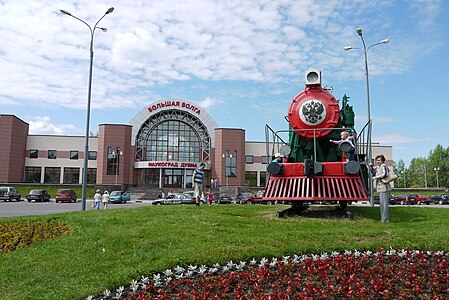

/content/dubna_images/451px-Dubna_Monument_Mikoyan-Gurevich_MiG-25.JPG


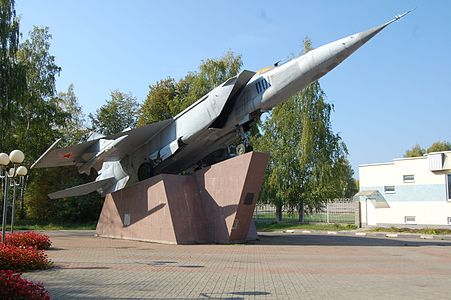

/content/dubna_images/15px-Commons-logo.svg.png


/content/dubna_images/22px-Flag_of_Tambov_Oblast.svg.png


/content/dubna_images/220px-DubnaStone.jpg


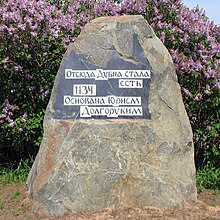

/content/dubna_images/220px-Organ_Hall_Dubna.JPG


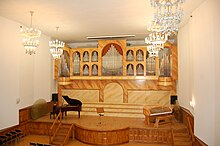

/content/dubna_images/22px-Flag_of_Poland.svg.png


/content/dubna_images/22px-Flag_of_Altai_Krai.svg.png


/content/dubna_images/22px-Flag_of_Kaluga_Oblast.svg.png


/content/dubna_images/22px-Flag_of_Crimea.svg.png


/content/dubna_images/220px-%D0%A2%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D0%BA%D0%B0%D0%BC_%D1%82%D1%8B%D0%BB%D0%B0.jpg


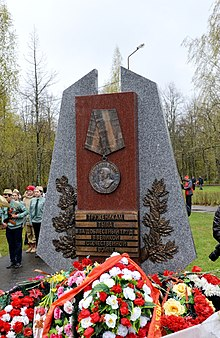

/content/dubna_images/290px-Outline_Map_of_Moscow_Oblast.svg.png


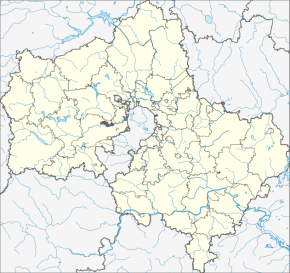

/content/dubna_images/449px-Dubna_Ilyushin_Il-2_4_of_4.JPG


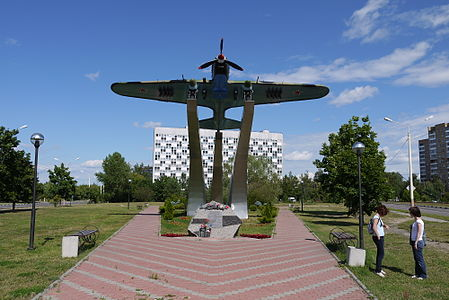

/content/dubna_images/220px-Dubna_Church_Our_Lady_Smolensk.JPG


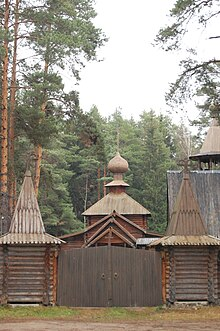

/content/dubna_images/451px-Pool_Archimedes_Dubna.JPG


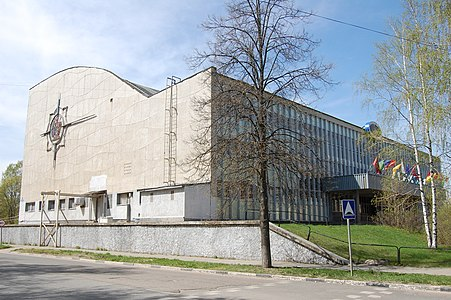

/content/dubna_images/22px-Flag_of_Slovakia.svg.png


/content/dubna_images/451px-%D0%A1onference_Hall_Dubna.JPG


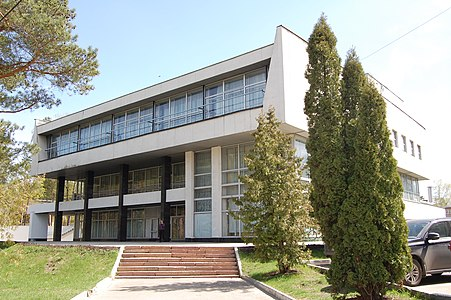

/content/dubna_images/451px-Meshcheryakov_Street_Store_Dubna.JPG


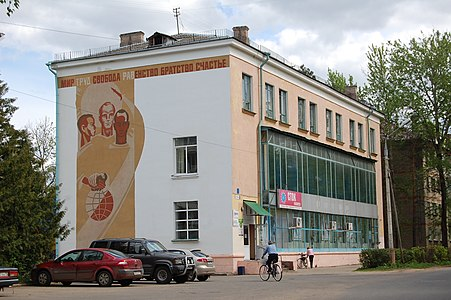

/content/dubna_images/220px-Tenzor_Dubna_Mosaic.JPG


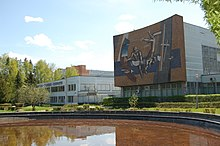

/content/dubna_images/451px-L%C3%A9ger_Mosaics_Dubna.JPG


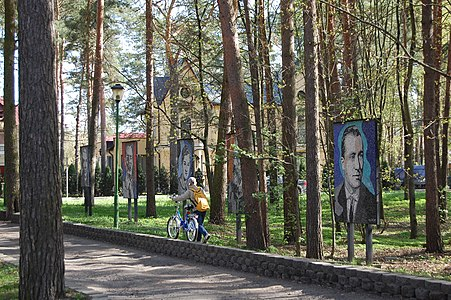

/content/dubna_images/160px-Flag_of_Dubna_%28Moscow_oblast%29_%282003%29.png


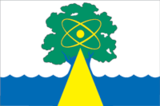

/content/dubna_images/220px-%D0%9F%D1%80%D0%BE%D1%85%D0%BE%D0%B4%D0%BD%D0%B0%D1%8F_%D0%94%D0%9C%D0%97_%D0%B8%D0%BC._%D0%9D.%D0%9F.%D0%A4%D0%B5%D0%B4%D0%BE%D1%80%D0%BE%D0%B2%D0%B0.jpg


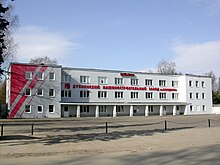

/content/dubna_images/220px-JINR_synchrophasotron.jpg


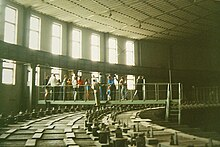

/content/dubna_images/50px-Coat_of_Arms_of_Moscow_oblast.svg.png


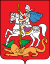

/content/dubna_images/9px-Orange_pog.svg.png


/content/dubna_images/22px-Flag_of_the_United_States.svg.png


/content/dubna_images/220px-%D0%A4%D0%B8%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BC_%D0%BD%D0%B0_%D1%83%D0%BB%D0%B8%D1%86%D0%B5_%D0%9B%D0%B5%D0%BD%D0%B8%D0%BD%D0%B0_%D0%B2_%D0%94%D1%83%D0%B1%D0%BD%D0%B5.jpg


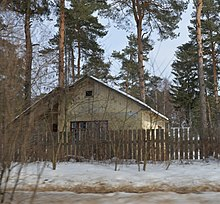

/content/dubna_images/451px-Bogolyubov_Prospekt_Dubna.JPG


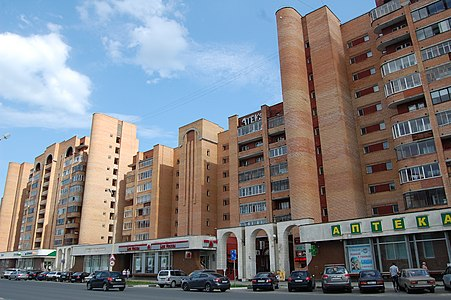

/content/dubna_images/24px-Notification-icon-Wiktionary-logo.svg.png


/content/dubna_images/9px-Green_pog.svg.png


/content/dubna_images/220px-%D0%94%D0%9A_%D0%9E%D0%BA%D1%82%D1%8F%D0%B1%D1%80%D1%8C.jpg


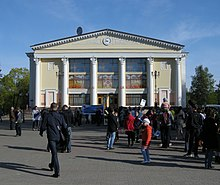

/content/dubna_images/220px-Lock_Museum_Dubna.JPG


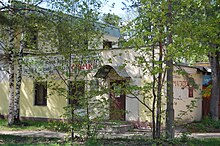

/content/dubna_images/220px-Association_Atom_Dubna.JPG


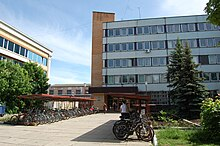

/content/dubna_images/22px-Flag_of_Israel.svg.png


/content/dubna_images/220px-%D0%A5%D1%80%D0%B0%D0%BC_%D0%9F%D0%BE%D1%85%D0%B2%D0%B0%D0%BB%D1%8B_%D0%9F%D1%80%D0%B5%D1%81%D0%B2%D1%8F%D1%82%D0%BE%D0%B9_%D0%91%D0%BE%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D0%B8%D1%86%D1%8B_%D0%B2_%D0%94%D1%83%D0%B1%D0%BD%D0%B5.jpeg


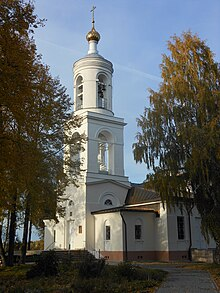

/content/dubna_images/451px-L%C3%A9ger_Mosaics_Dubna-2.JPG


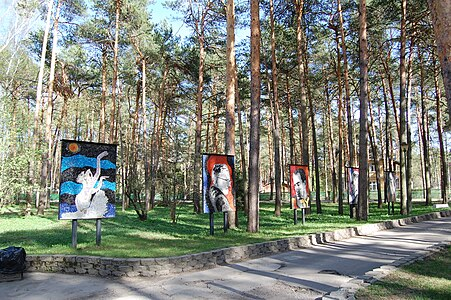

/content/dubna_images/290px-Russia_political_location_map_%28Crimea_disputed%29.svg.png


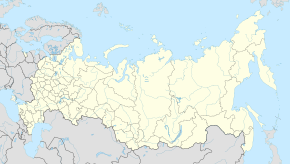

/content/dubna_images/24px-Notification-icon-Commons-logo.svg.png


/content/dubna_images/220px-%D0%9F%D0%B0%D0%BC%D1%8F%D1%82%D0%BD%D0%B8%D0%BA_%D0%BF%D0%BE%D0%B3%D0%B8%D0%B1%D1%88%D0%B8%D0%BC_%D0%B7%D0%B5%D0%BC%D0%BB%D1%8F%D0%BA%D0%B0%D0%BC_9_%D0%BC%D0%B0%D1%8F.jpg


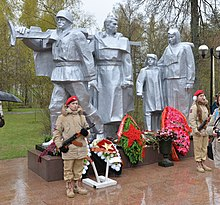

/content/dubna_images/14px-Wikipedia_interwiki_section_gear_icon.svg.png


/content/dubna_images/451px-Rotunda_Dubna.JPG


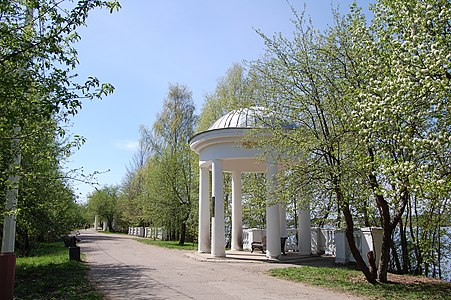

/content/dubna_images/50px-Flag_of_Moscow_oblast.svg.png


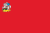

/content/dubna_images/22px-Flag_of_Moscow%2C_Russia.svg.png


/content/dubna_images/22px-Flag_of_Kazakhstan.svg.png


/content/dubna_images/450px-Sunset_at_Dubna..jpg


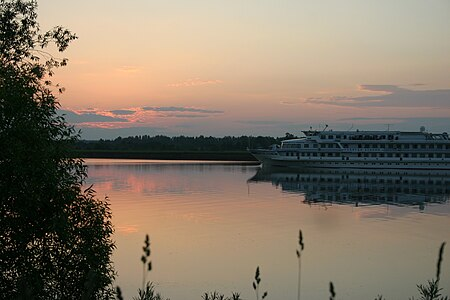

/content/dubna_images/22px-Flag_of_Moscow_oblast.svg.png


/content/dubna_images/451px-Blokhintsev_Library_Dubna.JPG


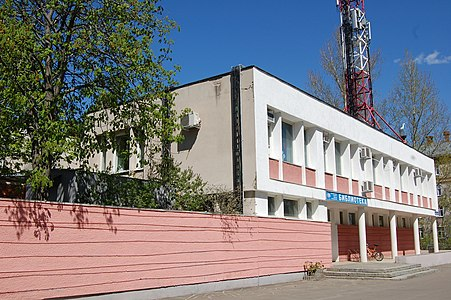

/content/dubna_images/22px-Flag_of_Saint_Petersburg_%28digital_version%29.svg.png


/content/dubna_images/451px-Residential_Complex_Frigate_Dubna.JPG


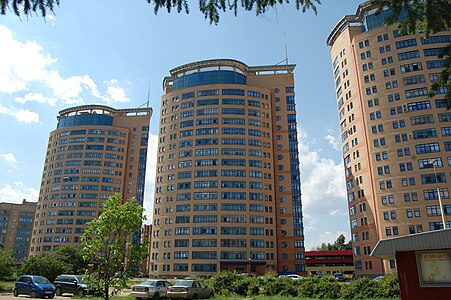

/content/dubna_images/451px-Sakharov_Street_Dubna.JPG


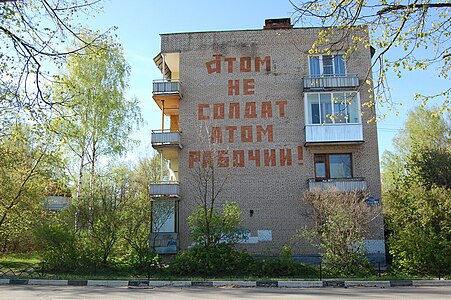

/content/dubna_images/451px-Stadium_Nauka_Dubna.JPG


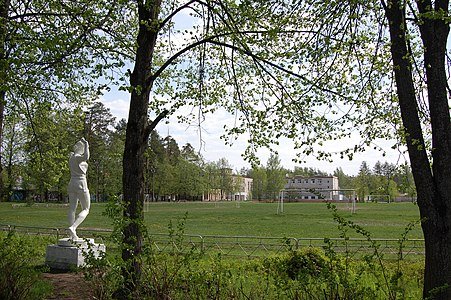

/content/dubna_images/22px-Flag_of_the_People%27s_Republic_of_China.svg.png


/content/dubna_images/22px-Flag_of_Slovenia.svg.png


/content/dubna_images/451px-Bogolyubov_Prospekt_Dubna-2.JPG


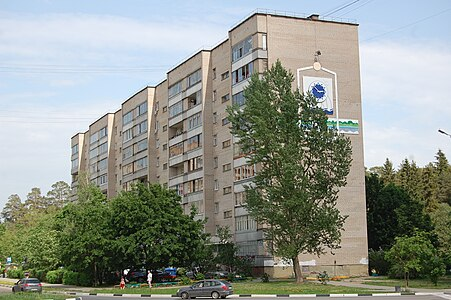

/content/dubna_images/451px-Vulykh_Towers_Dubna.JPG


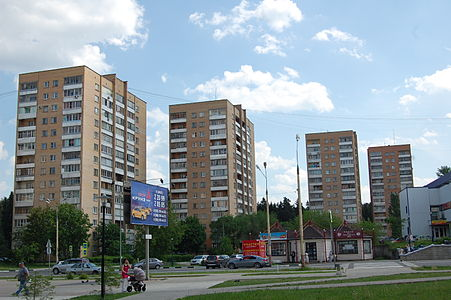

/content/dubna_images/449px-Dubna_Lenin.JPG


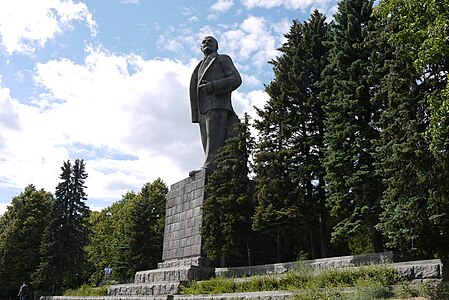

/content/dubna_images/90px-Coat_of_arms_of_Dubna.svg.png


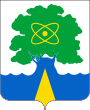

/content/dubna_images/451px-Dubna_Hotel_1.JPG


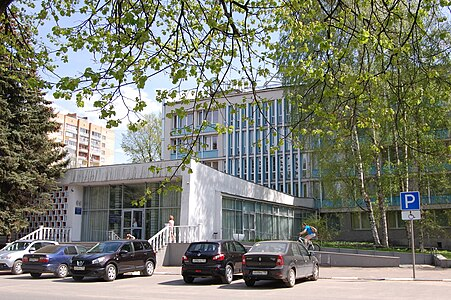

/content/dubna_images/22px-Flag_of_Novosibirsk_oblast.svg.png


/content/dubna_images/451px-Dubna_House.JPG


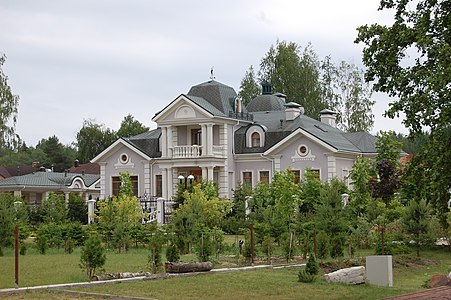

/content/dubna_images/22px-Flag_of_Russia.svg.png


/content/dubna_images/449px-Dubna_War_Memorial_and_Gardens.JPG


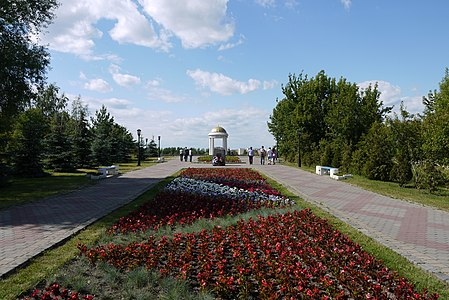

/content/dubna_images/451px-Cottage_Dubna-4.JPG


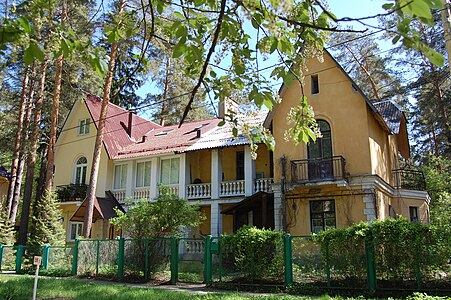

/content/dubna_images/220px-Dubna.house_of_scientiests.jpg


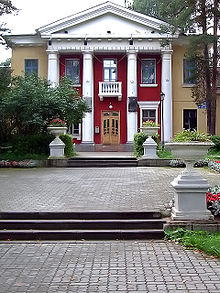

/content/dubna_images/290px-%D0%94%D1%83%D0%B1%D0%BD%D0%B0_%2850116392561%29.jpg


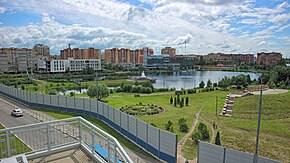

/content/dubna_images/448px-%D0%9F%D0%B0%D0%BC%D1%8F%D1%82%D0%BD%D0%B8%D0%BA_Aero_L-29_Delfin_%D0%B2_%D0%B4%D1%83%D0%B1%D0%BD%D0%B5.jpg


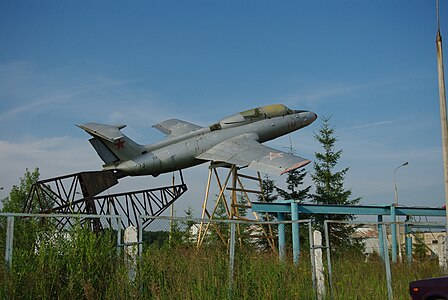

/content/dubna_images/451px-House_Culture_Mir_Dubna-2.JPG


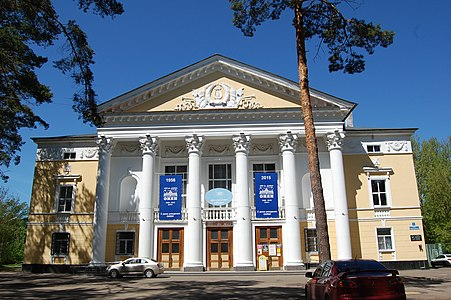

/content/dubna_images/48px-Question_book-4.svg.png


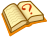

/content/dubna_images/14px-OOjs_UI_icon_edit-ltr-progressive.svg.png


/content/dubna_images/24px-Notification-icon-Wikivoyage-logo.svg.png


/content/dubna_images/220px-Cultur_House_Dubna.JPG


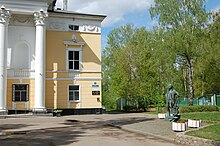

/content/dubna_images/451px-Casemate_Dubna.JPG


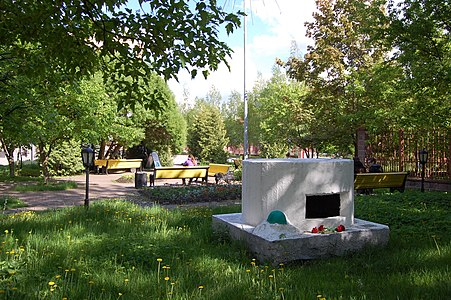

In [196]:
from IPython.display import Image
from pathlib import Path
for fname in Path('/content/dubna_images').glob('*'):
    print(fname)
    display(Image(filename=fname))